In [4]:
#Imports necessary libraries
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#Loading data from the url into Pandas Dataframe
url = 'https://raw.githubusercontent.com/NiHavn/Dave3625_Oblig2/main/TSLA.csv'

df = pd.read_csv(url) #Sets variable df to hold the data from the Dataframe
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-11-01,234.050003,237.399994,227.279999,227.820007,227.820007,62688800
1,2022-11-02,226.039993,227.869995,214.820007,214.979996,214.979996,63070300
2,2022-11-03,211.360001,221.199997,210.139999,215.309998,215.309998,56538800
3,2022-11-04,222.600006,223.800003,203.080002,207.470001,207.470001,98622200
4,2022-11-07,208.649994,208.899994,196.660004,197.080002,197.080002,93916500
...,...,...,...,...,...,...,...
246,2023-10-25,215.880005,220.100006,212.199997,212.419998,212.419998,107065100
247,2023-10-26,211.320007,214.800003,204.880005,205.759995,205.759995,115112600
248,2023-10-27,210.600006,212.410004,205.770004,207.300003,207.300003,94728100
249,2023-10-30,209.279999,210.880005,194.669998,197.360001,197.360001,136448200


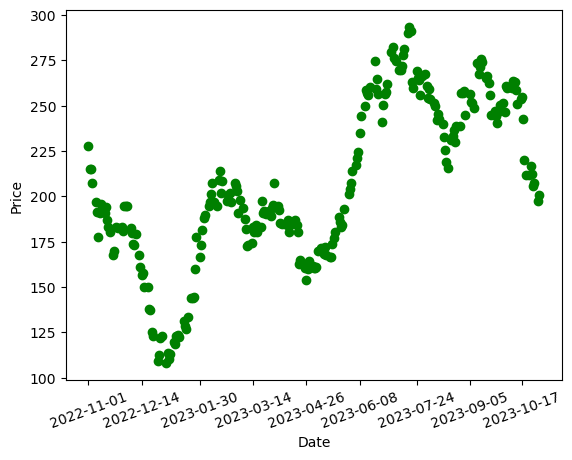

In [20]:
#First we need to do is to look at the data in a scatter plot, with matplotlib we can easly do this with plt.
#as well as using diffrent ticks to get an adjustable tickrate for data to show in the plot

plt.scatter(x='Date', y='Close', data=df, color='g')
plt.xticks(df['Date'][::30], rotation=20)# <- Rotates the plot 20 degrees just for readability purposes
plt.xlabel('Date')#Sets labels for the axes
plt.ylabel('Price')
plt.show()# Plots the diagram

In [18]:
#To make operations with regression we need to convert the Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])
#Now we make a new column for time difference for each date
df['DateDiff'] = (df['Date'] - df['Date'].min()).dt.days
#Before we start predicting we need to put each dataset into a training set, and a testing set
X = df['DateDiff'].values.reshape(-1, 1)
y = df['Close'].values
#Now we set up the learning algorythm where the testing datasize is only 20% of the total data, while the rest is training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) # Random state makes sure we have same results for each test
#Setting a polynomial degree of 6 
polynomial = PolynomialFeatures(degree=6)
#Here I transform the training and testing to include the polynomail features
X_polynomial_train = polynomial.fit_transform(X_train)
X_polynomial_test = polynomial.transform(X_test)
#This creates a linear regression model
graph = LinearRegression()
#The code below trains the model with the polynomail data
graph.fit(X_polynomial_train, y_train)

df

,Date,Open,High,Low,Close,Adj Close,Volume,DateDiff
0,2022-11-01,234.050003,237.399994,227.279999,227.820007,227.820007,62688800,0
1,2022-11-02,226.039993,227.869995,214.820007,214.979996,214.979996,63070300,1
2,2022-11-03,211.360001,221.199997,210.139999,215.309998,215.309998,56538800,2
3,2022-11-04,222.600006,223.800003,203.080002,207.470001,207.470001,98622200,3
4,2022-11-07,208.649994,208.899994,196.660004,197.080002,197.080002,93916500,6
...,...,...,...,...,...,...,...,...
246,2023-10-25,215.880005,220.100006,212.199997,212.419998,212.419998,107065100,358
247,2023-10-26,211.320007,214.800003,204.880005,205.759995,205.759995,115112600,359
248,2023-10-27,210.600006,212.410004,205.770004,207.300003,207.300003,94728100,360
249,2023-10-30,209.279999,210.880005,194.669998,197.360001,197.360001,136448200,363


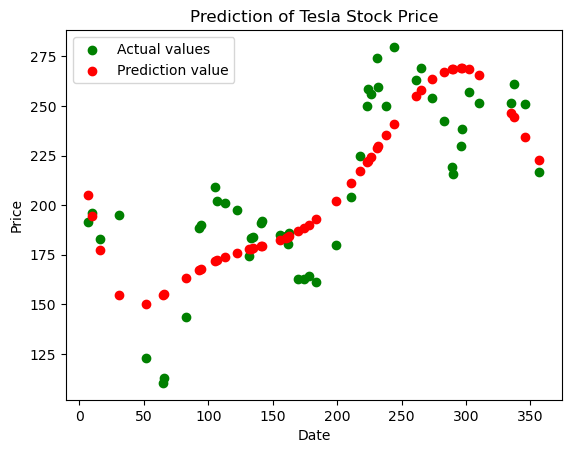

In [30]:
#Makes a prediction graph from the test data
y_pred = graph.predict(X_polynomial_test)
#Now we can set up the graph at wich we will use the test data and prediction data to
#plot how close the predictions are to the actuall results
plt.title('Prediction of Tesla Stock Price')#Just a header for the graph
plt.scatter(X_test, y_test, color='g', label='Actual values') #<- plots the testing dataset
plt.scatter(X_test, y_pred, color='r', label='Prediction value') #<- pots the testing dataset on the prediction set to get a prediction plot
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [29]:
#To evaluate ho effective the prediction was we can ue Mean Squared Error(MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"mean_squared_error: {mse}")# The lower the number of the mse, the more accurate prediction is given

#We can use the root of this value to futher calculate % prediction score
rootmse = np.sqrt(mse)
print(f"root_mean_squared_error: {rootmse}")

#To get the percentage value for this prediction we can calculate how well the
# predicted plot mimics the actual plot and multiply by 100 to get percentage
percentage_score = graph.score(X_polynomial_test, y_test)
print(f"Final score(%): {percentage_score * 100:.2f}%")


mean_squared_error: 635.5750629057054
root_mean_squared_error: 25.210614092197464
Final score(%): 63.84%
